<a href="https://colab.research.google.com/github/Alejandro-Arrazola/PID/blob/main/PID.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [200]:

from __future__ import division   # impone aritmética no entera en la división
from PIL import Image             # funciones para cargar y manipular imágenes
import numpy as np                # funciones numéricas (arrays, matrices, etc.)
import matplotlib.pyplot as plt   # funciones para representación gráfica
import seaborn as sbn
#%matplotlib inline # comando de Jupyter para que las imagenes se muestren automaticamente 

In [240]:
I = Image.open("indice.jpg")
plt.rcParams["figure.figsize"] = [10, 8]

(306, 467)


(-0.5, 466.5, 305.5, -0.5)

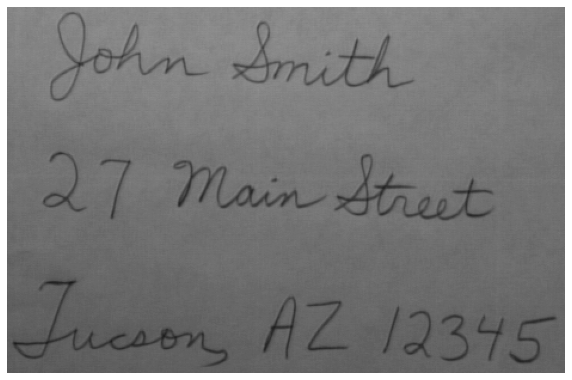

In [246]:
width, height = I.size 
rsize=1
I=I.resize((width*rsize,height*rsize))
data = np.asarray(I)
print(data.shape)
if data.ndim == 3:
    data=rgb2gray2(data)
#Modificacion para Mostrar en tono de grises
plt.imshow(np.uint8(data),cmap='gray',vmin=0, vmax=255)
plt.axis("off")

In [179]:
def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.2989, 0.5870, 0.1140])
def rgb2gray2(rgb):
    h , w  = rgb.shape[0:2]
    IBN=np.empty([h,w])
    for i in range(h):
        for j in range(w):
            IBN[i][j]= np.uint8(rgb[i][j][0]* 0.2989+ rgb[i][j][1]* 0.5870 + rgb[i][j][2]* 0.1140)
    return IBN

In [213]:
def Histograma(Im):
    hist = np.zeros (( 256))
    if Im.ndim == 3:
        Im = rgb2gray2(Im)
    [h , w]  = Im.shape
    for i in range(h):
        for j in range(w):
            pix = np.uint8(Im[i][j] )
            hist[pix] = hist[pix] + 1;
    return hist/sum(hist);
def HistogramaAcumulado(Im):
    hist = np.zeros (( 256))
    if Im.ndim == 3:
        Im = rgb2gray2(Im)
    [h , w]  = Im.shape
    for i in range(h):
        for j in range(w):
            pix = np.uint8(Im[i][j] )
            hist[pix] = hist[pix] + 1;
    hist= hist/sum(hist);
    for i in range(1,256):
        hist[i] =hist[i-1]+hist[i]
    return hist
def Equializacion(Im,H):
    Ieq = np.empty_like(Im)
    if Im.ndim == 3:
        Im = rgb2gray2(Im)
    [h , w]  = Im.shape
    for i in range(h):
        for j in range(w):
            Ieq[i][j]= round(255*H[np.uint8(Im[i][j])])
    return Ieq

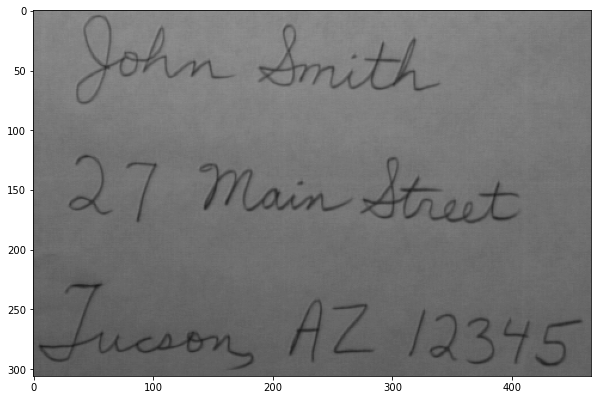

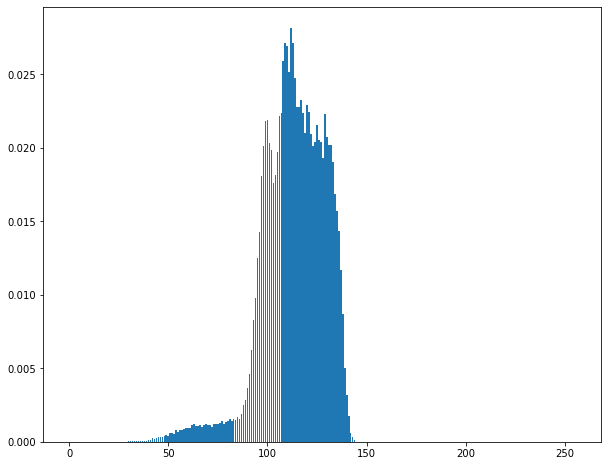

<BarContainer object of 256 artists>

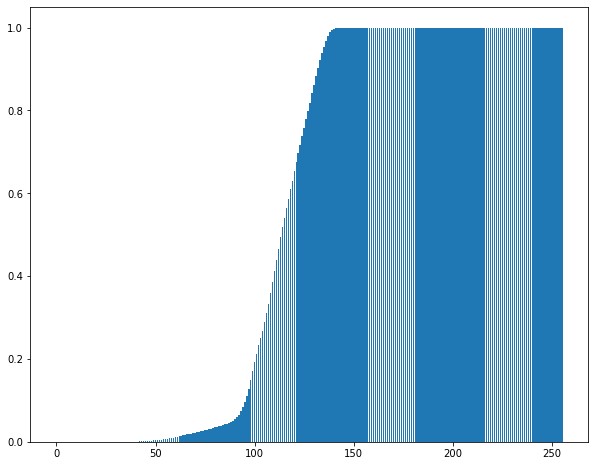

In [243]:



plt.imshow(np.uint8(data),cmap='gray',vmin=0, vmax=255)
plt.show()

HIm= histograma(data)
plt.bar(list(range(0,256)),HIm)
plt.show()

HImA = HistogramaAcumulado(data)
plt.bar(list(range(0,256)),HImA)


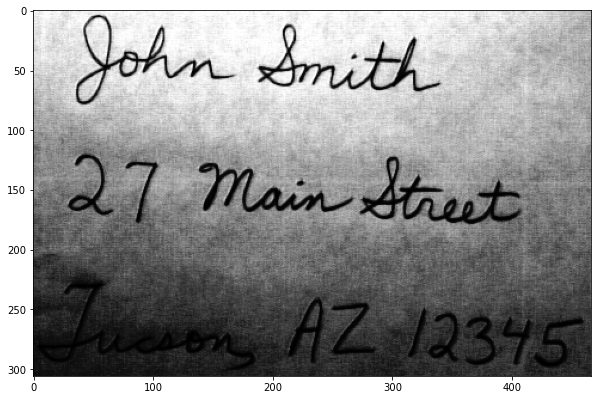

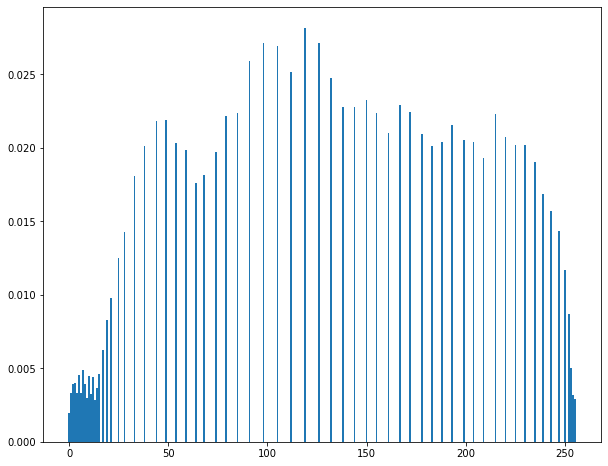

<BarContainer object of 256 artists>

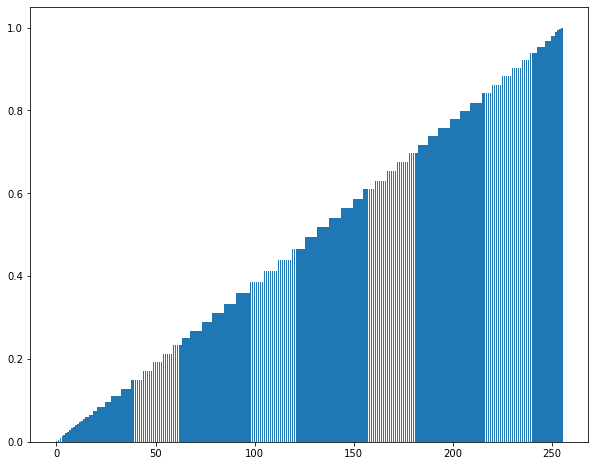

In [244]:
Ieq = Equializacion(data,HImA)


plt.imshow(np.uint8(Ieq),cmap='gray',vmin=0, vmax=255)
plt.show()

HIm= histograma(Ieq)
plt.bar(list(range(0,256)),HIm)
plt.show()

HImA = HistogramaAcumulado(Ieq)
plt.bar(list(range(0,256)),HImA)

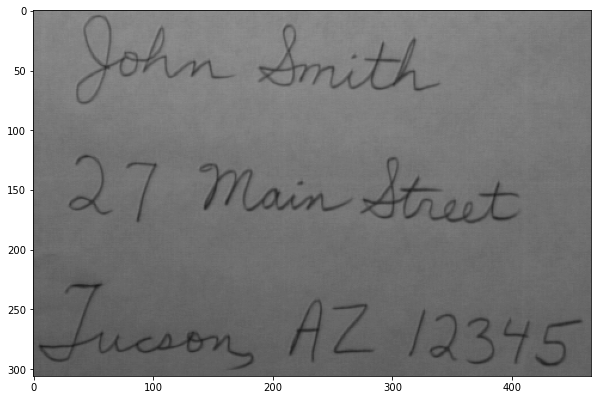

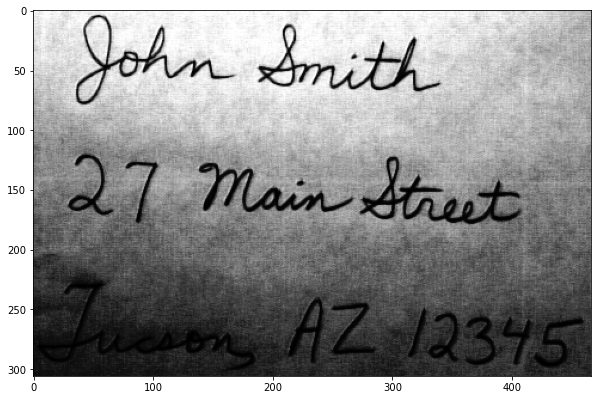

In [245]:

plt.imshow(np.uint8(data),cmap='gray',vmin=0, vmax=255)
plt.show()


plt.imshow(np.uint8(Ieq),cmap='gray',vmin=0, vmax=255)
plt.show()
